## Background

![Image Alt Text](images/straits_times.jpg)

The **Sit to Stand Test** serves as an assessment tool for evaluating leg strength and endurance among older adults. It is an integral component of the Fullerton Functional Fitness Test Battery. The development of this test aimed to address the floor effect encountered in the five or ten repetition sit to stand test when applied to older adults.

![Image Alt Text](images/sit-stand-test.jpg)

The muscle groups engaged during both the sit to stand test and squats exhibit **considerable similarity, encompassing the legs, thighs, and back muscles**. 

![Image Alt Text](images/muscle-group.jpg)

**Engaging in squat training can significantly enhance performance in the sit-and-stand test, thereby contributing to individuals' overall longevity and well-being.**

**Different Approaches to Learn Squats**

1. **Personalized Training with a Trainer** - In most cases, a personal trainer tailors a customized training program for the individual, but their fees are usually high.
<br>

2. **Learning through Online Video Demonstrations** - Online video demonstrations are readily available and free of cost, but they lack the capability to provide personalized feedback.
<br>

3. **Fitness Applications** - Free fitness apps available in the market often offer general self-management strategies, which can be beneficial. On the other hand, paid apps might include joint detection features but typically require a gym membership and additional fees for their services. Additionally, these apps lack specialized feedback mechanisms for squatting exercises.


## Problem Statement

The project aims to empower individuals to improve their health and fitness by offering an AI option to 

### (i) perform correct squats independently without an exercise coach;

### (ii) assess their squat performance;

### (iii) enhance their squat performance by using AI to provide prescriptive feedback to the squat form.


## Import Libraries and Modules

In [1]:
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing, ensemble, metrics, feature_selection, model_selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.metrics import confusion_matrix, recall_score, precision_score, classification_report, accuracy_score, roc_curve, roc_auc_score, RocCurveDisplay, f1_score

## Contents:
- [Data Import](#Data-Import)
- [Manual Modeling](#Manual-Modeling)
- [Modeling and Hyperparameters Tuning](#Modeling-and-Hyperparameters-Tuning)
- [Model Evaluation](#Model-Evaluation)


## Data Import

In [2]:
coordinates_df = pd.read_csv("data/coords.csv")
coordinates_df

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,Rest,0.429787,0.124724,-0.288868,0.999871,0.439223,0.105139,-0.294509,0.999860,0.444510,...,0.345616,0.529908,0.421035,0.920161,-0.068212,0.890566,0.425664,0.896875,0.259089,0.557966
1,Rest,0.429987,0.124991,-0.259555,0.999874,0.439233,0.105773,-0.269675,0.999863,0.444493,...,0.337917,0.527592,0.420221,0.921053,-0.073450,0.891321,0.425892,0.897638,0.257494,0.556362
2,Rest,0.430823,0.125169,-0.263092,0.999880,0.439768,0.106144,-0.272165,0.999869,0.444812,...,0.333816,0.528580,0.419921,0.921928,-0.090104,0.894069,0.425914,0.898530,0.255306,0.560090
3,Rest,0.431291,0.125154,-0.259533,0.999884,0.440098,0.106258,-0.268748,0.999874,0.445015,...,0.334046,0.524296,0.419030,0.922586,-0.087694,0.893417,0.426566,0.898410,0.255965,0.554980
4,Rest,0.431531,0.125360,-0.263824,0.999889,0.440243,0.106612,-0.272191,0.999879,0.445120,...,0.321103,0.526335,0.418745,0.923012,-0.108563,0.896314,0.427117,0.898055,0.242768,0.560145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749,Down,0.381907,0.352790,-0.198663,0.999415,0.388777,0.334306,-0.209695,0.999503,0.391900,...,0.466239,0.667088,0.413211,0.953542,0.019992,0.935980,0.423534,0.895472,0.499486,0.668292
1750,Down,0.372577,0.337063,-0.246611,0.999439,0.381172,0.317077,-0.252823,0.999516,0.384929,...,0.473823,0.668156,0.413594,0.953848,0.009141,0.936010,0.424995,0.895885,0.501197,0.667590
1751,Down,0.361494,0.245609,-0.237643,0.999210,0.369551,0.224374,-0.249927,0.999264,0.373341,...,0.462752,0.668580,0.418668,0.954115,-0.328243,0.941037,0.420748,0.898861,0.457038,0.678164
1752,Down,0.358109,0.226660,-0.225868,0.999083,0.367077,0.204885,-0.229884,0.999125,0.371720,...,0.396692,0.647497,0.427030,0.965512,-0.459815,0.944509,0.420310,0.869370,0.378737,0.664016


### (1) Checking for null values

In [3]:
pd.set_option('display.max_rows', 150)

#checking for null values 
print("Null Values for Coordinates Data")
display(coordinates_df.isnull().sum())
print("")

print("Information for Coordinates Data")
display(coordinates_df.info())

# print("Values counts for every column")
# coordinates_df.notnull().sum()


Null Values for Coordinates Data


class    0
x1       0
y1       0
z1       0
v1       0
x2       0
y2       0
z2       0
v2       0
x3       0
y3       0
z3       0
v3       0
x4       0
y4       0
z4       0
v4       0
x5       0
y5       0
z5       0
v5       0
x6       0
y6       0
z6       0
v6       0
x7       0
y7       0
z7       0
v7       0
x8       0
y8       0
z8       0
v8       0
x9       0
y9       0
z9       0
v9       0
x10      0
y10      0
z10      0
v10      0
x11      0
y11      0
z11      0
v11      0
x12      0
y12      0
z12      0
v12      0
x13      0
y13      0
z13      0
v13      0
x14      0
y14      0
z14      0
v14      0
x15      0
y15      0
z15      0
v15      0
x16      0
y16      0
z16      0
v16      0
x17      0
y17      0
z17      0
v17      0
x18      0
y18      0
z18      0
v18      0
x19      0
y19      0
z19      0
v19      0
x20      0
y20      0
z20      0
v20      0
x21      0
y21      0
z21      0
v21      0
x22      0
y22      0
z22      0
v22      0
x23      0
y23      0


Information for Coordinates Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754 entries, 0 to 1753
Columns: 133 entries, class to v33
dtypes: float64(132), object(1)
memory usage: 1.8+ MB


None

There's no null value in all columns. We can proceed to next modelling.

### (2) Checking for distribution of class

In [4]:
coordinates_df['class'].value_counts()

Rest    881
Down    873
Name: class, dtype: int64

In [5]:
coordinates_df.columns

Index(['class', 'x1', 'y1', 'z1', 'v1', 'x2', 'y2', 'z2', 'v2', 'x3',
       ...
       'z31', 'v31', 'x32', 'y32', 'z32', 'v32', 'x33', 'y33', 'z33', 'v33'],
      dtype='object', length=133)

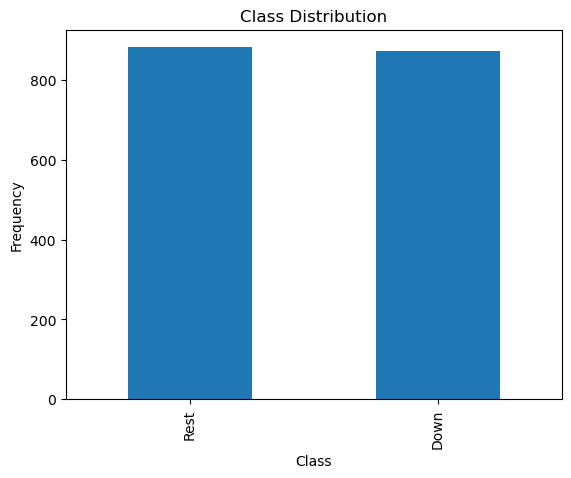

In [6]:
# Plot class distribution
# Plot subreddit distribution
plt.figure()
coordinates_df['class'].value_counts().plot(kind='bar')

plt.title('Class Distribution')
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

The class distributions are ensured to be even before we send the data for modeling.
This is to ensure there is no bias towards one of the classes.

Class 1 is 'Rest'; Class '0' is Down.

## Data Dictionary

With reference to the diagram above, we have 33 landmarks and 133 columns of data in total.

<br>

| Feature | Type | Dataset | Description |
| :--- | :--- | :--- | :---|
| class | str | coords | the label of the coordinates |
| x1 | int | coords | x-coordinate of the landmark 1: nose |
| y1 | int | coords | y-coordinate of the landmark 1: nose |
| z1 | int | coords | z-coordinate of the landmark 1: nose |
| v1 | int | coords | visibility of the landmark in computer vision |
| ... | ... | ... | ... |
| x33 | int | coords | x-coordinate of the landmark 33: nose |
| y33 | int | coords | y-coordinate of the landmark 33: nose |
| z33 | int | coords | z-coordinate of the landmark 33: nose |
| v33 | int | coords | visibility of landmark 33 in computer vision |

![Alt text](https://github.com/khammingfatt/project-5-ai-enhance-squat-form/blob/main/images/landmarks.jpg?raw=true)
 

## Manual Modeling

In [7]:
# Assemble our predictor variables (X) and our target (y)
X = coordinates_df.drop('class', axis = 1)
y = coordinates_df['class']

# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 99)


In [8]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Sieve out the columns which we want to apply label encoding on
# Fit the label encoder on y_train
label_encoder.fit(y_train)

LabelEncoder()

In [9]:
# Transform y_train and y_test to numerical format
y_train_numerical = label_encoder.transform(y_train)
y_test_numerical = label_encoder.transform(y_test)

In [10]:
# Checking for distributions
print("Rows and Columns of X_train")
display(X_train.shape)
print("Rows and Columns of X_test")
display(X_test.shape)
print("Rows and Columns of y_train")
display(y_train.shape)
print("Rows and Columns of y_test")
display(y_test.shape)

Rows and Columns of X_train


(1227, 132)

Rows and Columns of X_test


(527, 132)

Rows and Columns of y_train


(1227,)

Rows and Columns of y_test


(527,)

In [11]:
# Select the X & y features
X_train = X_train
y_train = y_train_numerical
X_test = X_test
y_test = y_test_numerical

rf = Pipeline([
    ('SS', StandardScaler()),
    ('clf', ensemble.RandomForestClassifier()),
])  # Add closing parenthesis for Pipeline constructor


In [12]:
tag = 'Random Forest Classifier - GridSearch CV'

# define constants for modelling
RS = 42 # random state
CV = 5 # cross val
SCORE = 'accuracy' # scoring

param_grid = {
    'clf__n_estimators': [100], #[100, 500, 1000, 1500, 2000],   # Number of trees in the forest
    'clf__max_depth': [10], #[None, 5, 10],  # Maximum depth of the tree
    'clf__min_samples_split': [2],  # Minimum number of samples required to split an internal node
    'clf__min_samples_leaf': [1],  # Minimum number of samples required to be at a leaf node
    'clf__max_features': ['sqrt'],  # Number of features to consider when looking for the best split
    'clf__bootstrap': [True, False], # Bootstrap
}

# Instantiate the GridSearchCV model
gs = GridSearchCV(estimator = rf,
                  param_grid = param_grid,
                  scoring = SCORE,
                  cv = CV,
                  verbose=2
)

# Fit the model & make prediction
gs.fit(X_train, y_train)
bm_1 = gs.best_estimator_

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END clf__bootstrap=True, clf__max_depth=10, clf__max_features=sqrt, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100; total time=   0.4s
[CV] END clf__bootstrap=True, clf__max_depth=10, clf__max_features=sqrt, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100; total time=   0.4s
[CV] END clf__bootstrap=True, clf__max_depth=10, clf__max_features=sqrt, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100; total time=   0.3s
[CV] END clf__bootstrap=True, clf__max_depth=10, clf__max_features=sqrt, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100; total time=   0.3s
[CV] END clf__bootstrap=True, clf__max_depth=10, clf__max_features=sqrt, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100; total time=   0.7s
[CV] END clf__bootstrap=False, clf__max_depth=10, clf__max_features=sqrt, clf__min_samples_leaf=1, clf__min_sa

In [13]:
y_pred = bm_1.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,

In [14]:
print(f'Classification Matrix: {classification_report(y_test, y_pred)}')
print(f'Accuracy (train): {bm_1.score(X_train, y_train)}')
print(f'Accuracy (test): {bm_1.score(X_test, y_test)}')
print(f'Train Cross-val-score(cv=5): {cross_val_score(bm_1, X_train, y_train, cv=CV).mean():,.4f}')
print(f'Test Cross-val-score(cv=5): {cross_val_score(bm_1, X_test, y_test, cv=CV).mean():,.4f}')

Classification Matrix:               precision    recall  f1-score   support

           0       1.00      0.99      1.00       254
           1       0.99      1.00      1.00       273

    accuracy                           1.00       527
   macro avg       1.00      1.00      1.00       527
weighted avg       1.00      1.00      1.00       527

Accuracy (train): 1.0
Accuracy (test): 0.9962049335863378
Train Cross-val-score(cv=5): 0.9976
Test Cross-val-score(cv=5): 0.9924


In [15]:
# Inverse transform the predicted labels to get the original class labels
y_pred = label_encoder.inverse_transform(y_pred)
y_test = label_encoder.inverse_transform(y_test)

display(y_test)
display(y_pred)

array(['Rest', 'Rest', 'Down', 'Rest', 'Down', 'Down', 'Down', 'Rest',
       'Rest', 'Down', 'Rest', 'Down', 'Rest', 'Rest', 'Down', 'Down',
       'Rest', 'Rest', 'Down', 'Rest', 'Down', 'Down', 'Down', 'Down',
       'Down', 'Down', 'Rest', 'Down', 'Rest', 'Rest', 'Rest', 'Down',
       'Rest', 'Rest', 'Rest', 'Down', 'Rest', 'Rest', 'Down', 'Rest',
       'Rest', 'Down', 'Down', 'Rest', 'Rest', 'Rest', 'Rest', 'Down',
       'Down', 'Down', 'Down', 'Rest', 'Down', 'Rest', 'Rest', 'Rest',
       'Rest', 'Down', 'Rest', 'Rest', 'Rest', 'Down', 'Rest', 'Down',
       'Down', 'Rest', 'Down', 'Down', 'Rest', 'Rest', 'Down', 'Down',
       'Down', 'Down', 'Rest', 'Rest', 'Down', 'Down', 'Rest', 'Down',
       'Rest', 'Rest', 'Rest', 'Rest', 'Rest', 'Down', 'Down', 'Rest',
       'Down', 'Rest', 'Rest', 'Rest', 'Down', 'Down', 'Rest', 'Down',
       'Rest', 'Down', 'Rest', 'Rest', 'Down', 'Rest', 'Down', 'Rest',
       'Down', 'Rest', 'Rest', 'Rest', 'Down', 'Rest', 'Down', 'Rest',
      

array(['Rest', 'Rest', 'Down', 'Rest', 'Down', 'Down', 'Down', 'Rest',
       'Rest', 'Down', 'Rest', 'Down', 'Rest', 'Rest', 'Down', 'Down',
       'Rest', 'Rest', 'Down', 'Rest', 'Rest', 'Down', 'Down', 'Down',
       'Down', 'Down', 'Rest', 'Down', 'Rest', 'Rest', 'Rest', 'Down',
       'Rest', 'Rest', 'Rest', 'Down', 'Rest', 'Rest', 'Down', 'Rest',
       'Rest', 'Down', 'Down', 'Rest', 'Rest', 'Rest', 'Rest', 'Down',
       'Down', 'Down', 'Down', 'Rest', 'Down', 'Rest', 'Rest', 'Rest',
       'Rest', 'Down', 'Rest', 'Rest', 'Rest', 'Down', 'Rest', 'Down',
       'Down', 'Rest', 'Down', 'Down', 'Rest', 'Rest', 'Down', 'Down',
       'Down', 'Down', 'Rest', 'Rest', 'Down', 'Down', 'Rest', 'Down',
       'Rest', 'Rest', 'Rest', 'Rest', 'Rest', 'Down', 'Down', 'Rest',
       'Down', 'Rest', 'Rest', 'Rest', 'Down', 'Down', 'Rest', 'Down',
       'Rest', 'Down', 'Rest', 'Rest', 'Down', 'Rest', 'Down', 'Rest',
       'Down', 'Rest', 'Rest', 'Rest', 'Down', 'Rest', 'Down', 'Rest',
      

## Modeling and Hyperparameters Tuning

### Writing Out the Model Function

In [16]:
# Define a function that returns the model scores
# Set view_cm to True to get confusion matrix visualisation
def get_model_score (X, y, pipe, view_cm = False):
    
    # Split the data into train & test by 70 / 30
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
    
    # Create a LabelEncoder object
    label_encoder = LabelEncoder()
    label_encoder.fit(y_train)
    
    # Transform y_train and y_test to numerical format
    y_train = label_encoder.transform(y_train)
    y_test = label_encoder.transform(y_test)
    
    #  the data
    pipe.fit(X_train, y_train)
    display(pipe) # Remove is there is an error
    
    # Make prediction with the model 
    y_pred = pipe.predict(X_test)
    
    # Save confusion matrix values
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    spec = tn / (tn + fp)
    
    fp, tp, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fp, tp)

    print(classification_report(y_test, y_pred))
    print(f'Accuracy (train): {pipe.score(X_train, y_train)}')
    print(f'Accuracy (test): {pipe.score(X_test, y_test)}')
    print(f'Cross-val-score(cv=5): {cross_val_score(pipe, X_train, y_train, cv=5).mean()}')
    print(f'Sensitivity(TPR): {recall_score(y_test, y_pred)}')
    print(f'Specificity(TNR): {spec}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'ROC_AUC: {roc_auc}')
    print('-------------------------------------------------------\n')
    
    if view_cm: 
        
        cm = confusion_matrix(y_test, y_pred)

        ax = sns.heatmap(data=cm, cmap=sns.color_palette(['tomato', 'lightgreen'], as_cmap=True), annot=[[f"TN={cm[0][0]:.0f}", f"FN={cm[0][1]:.0f}"], [f"FP={cm[1][0]:.0f}", f"TP={cm[1][1]:.0f}"]],
                         fmt='', annot_kws={'fontsize': 24}, cbar=False, square=True)

        ax.set_xlabel('Actual')
        ax.set_ylabel('Predicted')
        ax.tick_params(length=0, labeltop=True, labelbottom=False)
        ax.xaxis.set_label_position('top')
        ax.set_xticklabels(['Negative (0)', 'Positive (1)'])
        ax.set_yticklabels(['Negative (0)', 'Positive (1)'], rotation=90, va='center')
        ax.add_patch(plt.Rectangle((0, 1), 1, 0.1, color='ivory', clip_on=False, zorder=0, transform=ax.transAxes))
        ax.add_patch(plt.Rectangle((0, 0), -0.1, 1, color='ivory', clip_on=False, zorder=0, transform=ax.transAxes))
        plt.tight_layout()
        plt.show()

In [17]:
# Define a function that runs GridSearchCV with the Parameters given & return the scores
def get_gridsearch_params(X, y, model, params, folds, view_cm = False):
    
    # Split the data into train & test by 70 / 30
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Create a LabelEncoder object
    label_encoder = LabelEncoder()
    label_encoder.fit(y_train)

    # Transform y_train and y_test to numerical format
    y_train = label_encoder.transform(y_train)
    y_test = label_encoder.transform(y_test)
    
    # Instantiate the GridSearchCV model
    gs_model = GridSearchCV(estimator=model,
                            param_grid=params,
                            scoring='accuracy',
                            cv=folds,
                            verbose=2
    )
    
    # Fit the model
    gs_model.fit(X_train, y_train)
    y_train_pred = gs_model.predict(X_train)
    y_pred = gs_model.predict(X_test)
    
    # Save confusion matrix values
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    spec = tn / (tn + fp)
    
    print(f'Best Hyperparameters: {gs_model.best_params_}') # Display the best hyperparameters for the selected model
    print(f'Best training accuracy: {gs_model.best_score_}')
    print(f'Test set accuracy score for best params: {accuracy_score(y_test, y_pred)}')
    # Display the scores for the GridSearched Best Model
    print('-------------------------------------------------------\n')
    print(classification_report(y_test, y_pred))
    print(f'Sensitivity(TPR): {recall_score(y_test, y_pred)}')
    print(f'Specificity(TNR): {spec}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'F1 Score(Train): {f1_score(y_train, y_train_pred)}')
    print(f'F1 Score(Test): {f1_score(y_test, y_pred)}')
    print('-------------------------------------------------------\n')

    if view_cm: 
        
        cm = confusion_matrix(y_test, y_pred)

        ax = sns.heatmap(data=cm, cmap=sns.color_palette(['tomato', 'lightgreen'], as_cmap=True), annot=[[f"TN={cm[0][0]:.0f}", f"FN={cm[0][1]:.0f}"], [f"FP={cm[1][0]:.0f}", f"TP={cm[1][1]:.0f}"]],
                         fmt='', annot_kws={'fontsize': 24}, cbar=False, square=True)

        ax.set_xlabel('Actual')
        ax.set_ylabel('Predicted')
        ax.tick_params(length=0, labeltop=True, labelbottom=False)
        ax.xaxis.set_label_position('top')
        ax.set_xticklabels(['Negative (0)', 'Positive (1)'])
        ax.set_yticklabels(['Negative (0)', 'Positive (1)'], rotation=90, va='center')
        ax.add_patch(plt.Rectangle((0, 1), 1, 0.1, color='ivory', clip_on=False, zorder=0, transform=ax.transAxes))
        ax.add_patch(plt.Rectangle((0, 0), -0.1, 1, color='ivory', clip_on=False, zorder=0, transform=ax.transAxes))
        plt.tight_layout()
        plt.show()
    
    return

### Model 1 - Random Forest

Pipeline(steps=[('SS', StandardScaler()), ('clf', RandomForestClassifier())])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       254
           1       1.00      1.00      1.00       273

    accuracy                           1.00       527
   macro avg       1.00      1.00      1.00       527
weighted avg       1.00      1.00      1.00       527

Accuracy (train): 1.0
Accuracy (test): 0.9981024667931688
Cross-val-score(cv=5): 0.9975510204081633
Sensitivity(TPR): 1.0
Specificity(TNR): 0.9960629921259843
Precision: 0.9963503649635036
ROC_AUC: 0.9980314960629921
-------------------------------------------------------



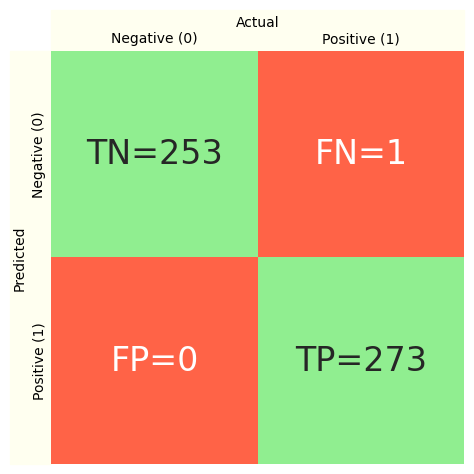

In [18]:
# Assemble our predictor variables (X) and our target (y)
X = coordinates_df.drop('class', axis = 1)
y = coordinates_df['class']

rf = Pipeline([
    ('SS', StandardScaler()),
    ('clf', ensemble.RandomForestClassifier()),
])  # Add closing parenthesis for Pipeline constructor

get_model_score(X, y, rf, view_cm = True)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END clf__bootstrap=True, clf__max_depth=5, clf__max_features=sqrt, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100; total time=   0.8s
[CV] END clf__bootstrap=True, clf__max_depth=5, clf__max_features=sqrt, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100; total time=   0.8s
[CV] END clf__bootstrap=True, clf__max_depth=5, clf__max_features=sqrt, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100; total time=   0.8s
[CV] END clf__bootstrap=True, clf__max_depth=5, clf__max_features=sqrt, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100; total time=   0.7s
[CV] END clf__bootstrap=True, clf__max_depth=5, clf__max_features=sqrt, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100; total time=   0.9s
[CV] END clf__bootstrap=True, clf__max_depth=5, clf__max_features=sqrt, clf__min_samples_leaf=1, clf__min_samples

[CV] END clf__bootstrap=True, clf__max_depth=5, clf__max_features=sqrt, clf__min_samples_leaf=5, clf__min_samples_split=5, clf__n_estimators=500; total time=   2.2s
[CV] END clf__bootstrap=True, clf__max_depth=5, clf__max_features=sqrt, clf__min_samples_leaf=5, clf__min_samples_split=5, clf__n_estimators=500; total time=   2.1s
[CV] END clf__bootstrap=True, clf__max_depth=5, clf__max_features=sqrt, clf__min_samples_leaf=5, clf__min_samples_split=5, clf__n_estimators=500; total time=   2.1s
[CV] END clf__bootstrap=True, clf__max_depth=5, clf__max_features=sqrt, clf__min_samples_leaf=5, clf__min_samples_split=5, clf__n_estimators=500; total time=   2.1s
[CV] END clf__bootstrap=True, clf__max_depth=5, clf__max_features=sqrt, clf__min_samples_leaf=5, clf__min_samples_split=5, clf__n_estimators=500; total time=   2.2s
[CV] END clf__bootstrap=True, clf__max_depth=5, clf__max_features=sqrt, clf__min_samples_leaf=5, clf__min_samples_split=5, clf__n_estimators=1000; total time=   4.5s
[CV] END 

[CV] END clf__bootstrap=True, clf__max_depth=10, clf__max_features=sqrt, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=1000; total time=   5.4s
[CV] END clf__bootstrap=True, clf__max_depth=10, clf__max_features=sqrt, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=1000; total time=   4.4s
[CV] END clf__bootstrap=True, clf__max_depth=10, clf__max_features=sqrt, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=1000; total time=   4.4s
[CV] END clf__bootstrap=True, clf__max_depth=10, clf__max_features=sqrt, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=1000; total time=   4.3s
[CV] END clf__bootstrap=True, clf__max_depth=10, clf__max_features=sqrt, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=1000; total time=   5.0s
[CV] END clf__bootstrap=True, clf__max_depth=10, clf__max_features=sqrt, clf__min_samples_leaf=5, clf__min_samples_split=5, clf__n_estimators=100; total time=   0.4s

[CV] END clf__bootstrap=False, clf__max_depth=5, clf__max_features=sqrt, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=100; total time=   0.4s
[CV] END clf__bootstrap=False, clf__max_depth=5, clf__max_features=sqrt, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=100; total time=   0.4s
[CV] END clf__bootstrap=False, clf__max_depth=5, clf__max_features=sqrt, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=100; total time=   0.4s
[CV] END clf__bootstrap=False, clf__max_depth=5, clf__max_features=sqrt, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=100; total time=   0.3s
[CV] END clf__bootstrap=False, clf__max_depth=5, clf__max_features=sqrt, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=100; total time=   0.4s
[CV] END clf__bootstrap=False, clf__max_depth=5, clf__max_features=sqrt, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=500; total time=   2.2s
[CV]

[CV] END clf__bootstrap=False, clf__max_depth=10, clf__max_features=sqrt, clf__min_samples_leaf=1, clf__min_samples_split=5, clf__n_estimators=500; total time=   4.4s
[CV] END clf__bootstrap=False, clf__max_depth=10, clf__max_features=sqrt, clf__min_samples_leaf=1, clf__min_samples_split=5, clf__n_estimators=500; total time=   4.7s
[CV] END clf__bootstrap=False, clf__max_depth=10, clf__max_features=sqrt, clf__min_samples_leaf=1, clf__min_samples_split=5, clf__n_estimators=500; total time=   4.6s
[CV] END clf__bootstrap=False, clf__max_depth=10, clf__max_features=sqrt, clf__min_samples_leaf=1, clf__min_samples_split=5, clf__n_estimators=500; total time=   4.4s
[CV] END clf__bootstrap=False, clf__max_depth=10, clf__max_features=sqrt, clf__min_samples_leaf=1, clf__min_samples_split=5, clf__n_estimators=500; total time=   4.8s
[CV] END clf__bootstrap=False, clf__max_depth=10, clf__max_features=sqrt, clf__min_samples_leaf=1, clf__min_samples_split=5, clf__n_estimators=1000; total time=   8.

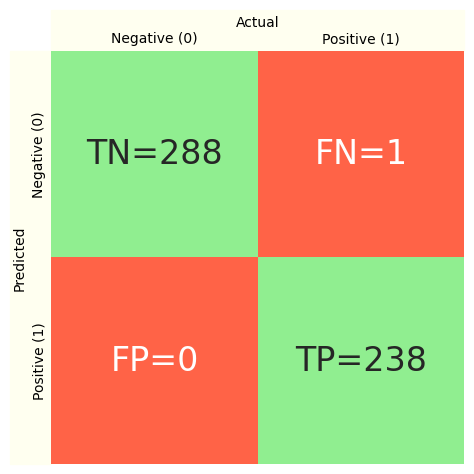

In [19]:
# Assemble our predictor variables (X) and our target (y)
X = coordinates_df.drop('class', axis = 1)
y = coordinates_df['class']

rf = Pipeline([
    ('SS', StandardScaler()),
    ('clf', ensemble.RandomForestClassifier()),
])  # Add closing parenthesis for Pipeline constructor

tag = 'Random Forest Classifier - GridSearch CV'

param_grid = {
    'clf__n_estimators': [100, 500, 1000], #[100, 500, 1000, 1500, 2000],   # Number of trees in the forest
    'clf__max_depth': [5, 10], #[None, 5, 10],  # Maximum depth of the tree
    'clf__min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'clf__min_samples_leaf': [1, 5],  # Minimum number of samples required to be at a leaf node
    'clf__max_features': ['sqrt'],  # Number of features to consider when looking for the best split
    'clf__bootstrap': [True, False], # Bootstrap
}

get_gridsearch_params(X, y, rf, param_grid, folds=5, view_cm = True)

### Model 2 - Logistic Regression

Pipeline(steps=[('SS', StandardScaler()), ('lr', LogisticRegression())])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       254
           1       1.00      1.00      1.00       273

    accuracy                           1.00       527
   macro avg       1.00      1.00      1.00       527
weighted avg       1.00      1.00      1.00       527

Accuracy (train): 1.0
Accuracy (test): 1.0
Cross-val-score(cv=5): 0.9975543388086943
Sensitivity(TPR): 1.0
Specificity(TNR): 1.0
Precision: 1.0
ROC_AUC: 1.0
-------------------------------------------------------



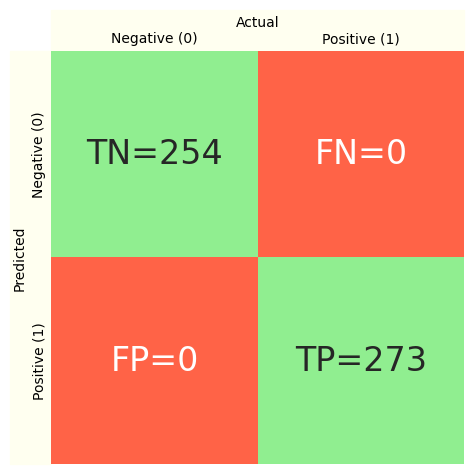

In [20]:
# Assemble our predictor variables (X) and our target (y)
X = coordinates_df.drop('class', axis = 1)
y = coordinates_df['class']

lr = Pipeline([
    ('SS', StandardScaler()),
    ('lr', LogisticRegression()),
])

get_model_score(X, y, lr, view_cm = True)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END lr__C=0.1, lr__max_iter=100, lr__penalty=l1, lr__solver=liblinear; total time=   0.0s
[CV] END lr__C=0.1, lr__max_iter=100, lr__penalty=l1, lr__solver=liblinear; total time=   0.0s
[CV] END lr__C=0.1, lr__max_iter=100, lr__penalty=l1, lr__solver=liblinear; total time=   0.0s
[CV] END lr__C=0.1, lr__max_iter=100, lr__penalty=l1, lr__solver=liblinear; total time=   0.0s
[CV] END lr__C=0.1, lr__max_iter=100, lr__penalty=l1, lr__solver=liblinear; total time=   0.0s
[CV] END lr__C=0.1, lr__max_iter=100, lr__penalty=l2, lr__solver=liblinear; total time=   0.0s
[CV] END lr__C=0.1, lr__max_iter=100, lr__penalty=l2, lr__solver=liblinear; total time=   0.0s
[CV] END lr__C=0.1, lr__max_iter=100, lr__penalty=l2, lr__solver=liblinear; total time=   0.0s
[CV] END lr__C=0.1, lr__max_iter=100, lr__penalty=l2, lr__solver=liblinear; total time=   0.0s
[CV] END lr__C=0.1, lr__max_iter=100, lr__penalty=l2, lr__solver=liblinear; total ti

[CV] END lr__C=10.0, lr__max_iter=300, lr__penalty=l2, lr__solver=liblinear; total time=   0.0s
[CV] END lr__C=10.0, lr__max_iter=300, lr__penalty=l2, lr__solver=liblinear; total time=   0.0s
[CV] END lr__C=10.0, lr__max_iter=300, lr__penalty=l2, lr__solver=liblinear; total time=   0.0s
Best Hyperparameters: {'lr__C': 1.0, 'lr__max_iter': 100, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}
Best training accuracy: 1.0
Test set accuracy score for best params: 1.0
-------------------------------------------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       289
           1       1.00      1.00      1.00       238

    accuracy                           1.00       527
   macro avg       1.00      1.00      1.00       527
weighted avg       1.00      1.00      1.00       527

Sensitivity(TPR): 1.0
Specificity(TNR): 1.0
Precision: 1.0
F1 Score(Train): 1.0
F1 Score(Test): 1.0
-------------------------------------------------

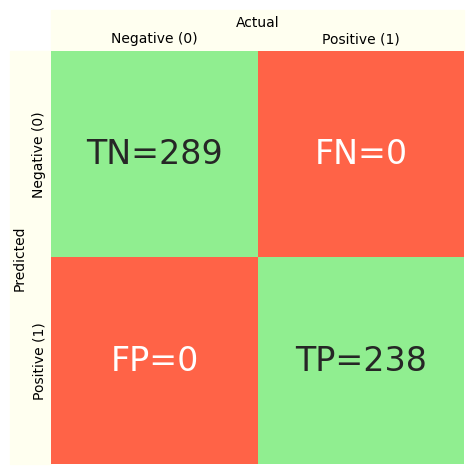

In [21]:
# Assemble our predictor variables (X) and our target (y)
X = coordinates_df.drop('class', axis = 1)
y = coordinates_df['class']

lr = Pipeline([
    ('SS', StandardScaler()),
    ('lr', LogisticRegression()),
])

param_grid = {
    'lr__penalty': ['l1', 'l2'],  # Regularization penalty ('l1' for L1 regularization, 'l2' for L2 regularization)
    'lr__C': [0.1, 1.0, 10.0],  # Inverse of regularization strength (smaller values specify stronger regularization)
    'lr__solver': ['liblinear'],  # Solver algorithm ('liblinear' for small datasets)
    'lr__max_iter': [100, 200, 300],  # Maximum number of iterations
}

get_gridsearch_params(X, y, lr, param_grid, folds=5, view_cm = True)

### Model 3 - Gradient Boost Model

Pipeline(steps=[('SS', StandardScaler()), ('gb', GradientBoostingClassifier())])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       254
           1       1.00      1.00      1.00       273

    accuracy                           1.00       527
   macro avg       1.00      1.00      1.00       527
weighted avg       1.00      1.00      1.00       527

Accuracy (train): 1.0
Accuracy (test): 1.0
Cross-val-score(cv=5): 0.9983673469387755
Sensitivity(TPR): 1.0
Specificity(TNR): 1.0
Precision: 1.0
ROC_AUC: 1.0
-------------------------------------------------------



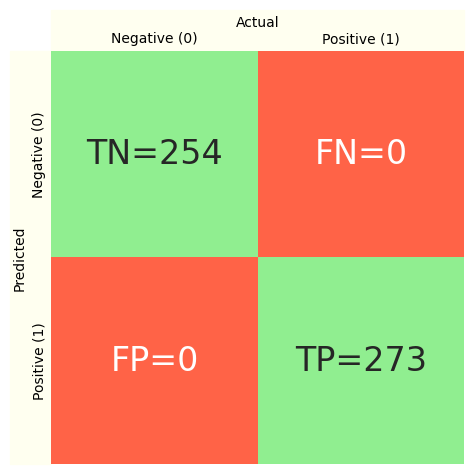

In [22]:
# Assemble our predictor variables (X) and our target (y)
X = coordinates_df.drop('class', axis = 1)
y = coordinates_df['class']

gb = Pipeline([
    ('SS', StandardScaler()),
    ('gb', GradientBoostingClassifier()),
])

get_model_score(X, y, gb, view_cm = True)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END gb__learning_rate=0.1, gb__max_depth=3, gb__max_features=sqrt, gb__min_samples_leaf=1, gb__min_samples_split=2, gb__n_estimators=100; total time=   0.7s
[CV] END gb__learning_rate=0.1, gb__max_depth=3, gb__max_features=sqrt, gb__min_samples_leaf=1, gb__min_samples_split=2, gb__n_estimators=100; total time=   0.7s
[CV] END gb__learning_rate=0.1, gb__max_depth=3, gb__max_features=sqrt, gb__min_samples_leaf=1, gb__min_samples_split=2, gb__n_estimators=100; total time=   0.7s
[CV] END gb__learning_rate=0.1, gb__max_depth=3, gb__max_features=sqrt, gb__min_samples_leaf=1, gb__min_samples_split=2, gb__n_estimators=100; total time=   0.7s
[CV] END gb__learning_rate=0.1, gb__max_depth=3, gb__max_features=sqrt, gb__min_samples_leaf=1, gb__min_samples_split=2, gb__n_estimators=100; total time=   0.7s
[CV] END gb__learning_rate=0.1, gb__max_depth=3, gb__max_features=sqrt, gb__min_samples_leaf=1, gb__min_samples_split=2, gb__n_e

[CV] END gb__learning_rate=0.1, gb__max_depth=3, gb__max_features=log2, gb__min_samples_leaf=1, gb__min_samples_split=8, gb__n_estimators=100; total time=   0.5s
[CV] END gb__learning_rate=0.1, gb__max_depth=3, gb__max_features=log2, gb__min_samples_leaf=1, gb__min_samples_split=8, gb__n_estimators=100; total time=   0.5s
[CV] END gb__learning_rate=0.1, gb__max_depth=3, gb__max_features=log2, gb__min_samples_leaf=1, gb__min_samples_split=8, gb__n_estimators=100; total time=   0.7s
[CV] END gb__learning_rate=0.1, gb__max_depth=3, gb__max_features=log2, gb__min_samples_leaf=1, gb__min_samples_split=8, gb__n_estimators=100; total time=   0.5s
[CV] END gb__learning_rate=0.1, gb__max_depth=3, gb__max_features=log2, gb__min_samples_leaf=1, gb__min_samples_split=8, gb__n_estimators=1000; total time=   4.4s
[CV] END gb__learning_rate=0.1, gb__max_depth=3, gb__max_features=log2, gb__min_samples_leaf=1, gb__min_samples_split=8, gb__n_estimators=1000; total time=   2.8s
[CV] END gb__learning_rate

[CV] END gb__learning_rate=0.1, gb__max_depth=7, gb__max_features=sqrt, gb__min_samples_leaf=2, gb__min_samples_split=2, gb__n_estimators=100; total time=   2.0s
[CV] END gb__learning_rate=0.1, gb__max_depth=7, gb__max_features=sqrt, gb__min_samples_leaf=2, gb__min_samples_split=2, gb__n_estimators=100; total time=   1.7s
[CV] END gb__learning_rate=0.1, gb__max_depth=7, gb__max_features=sqrt, gb__min_samples_leaf=2, gb__min_samples_split=2, gb__n_estimators=100; total time=   1.6s
[CV] END gb__learning_rate=0.1, gb__max_depth=7, gb__max_features=sqrt, gb__min_samples_leaf=2, gb__min_samples_split=2, gb__n_estimators=1000; total time=   3.4s
[CV] END gb__learning_rate=0.1, gb__max_depth=7, gb__max_features=sqrt, gb__min_samples_leaf=2, gb__min_samples_split=2, gb__n_estimators=1000; total time=   4.0s
[CV] END gb__learning_rate=0.1, gb__max_depth=7, gb__max_features=sqrt, gb__min_samples_leaf=2, gb__min_samples_split=2, gb__n_estimators=1000; total time=   5.5s
[CV] END gb__learning_rat

[CV] END gb__learning_rate=0.1, gb__max_depth=7, gb__max_features=log2, gb__min_samples_leaf=2, gb__min_samples_split=8, gb__n_estimators=100; total time=   0.9s
[CV] END gb__learning_rate=0.1, gb__max_depth=7, gb__max_features=log2, gb__min_samples_leaf=2, gb__min_samples_split=8, gb__n_estimators=100; total time=   1.2s
[CV] END gb__learning_rate=0.1, gb__max_depth=7, gb__max_features=log2, gb__min_samples_leaf=2, gb__min_samples_split=8, gb__n_estimators=1000; total time=   2.1s
[CV] END gb__learning_rate=0.1, gb__max_depth=7, gb__max_features=log2, gb__min_samples_leaf=2, gb__min_samples_split=8, gb__n_estimators=1000; total time=   2.1s
[CV] END gb__learning_rate=0.1, gb__max_depth=7, gb__max_features=log2, gb__min_samples_leaf=2, gb__min_samples_split=8, gb__n_estimators=1000; total time=   2.4s
[CV] END gb__learning_rate=0.1, gb__max_depth=7, gb__max_features=log2, gb__min_samples_leaf=2, gb__min_samples_split=8, gb__n_estimators=1000; total time=   2.0s
[CV] END gb__learning_ra

[CV] END gb__learning_rate=0.01, gb__max_depth=3, gb__max_features=log2, gb__min_samples_leaf=1, gb__min_samples_split=2, gb__n_estimators=100; total time=   0.5s
[CV] END gb__learning_rate=0.01, gb__max_depth=3, gb__max_features=log2, gb__min_samples_leaf=1, gb__min_samples_split=2, gb__n_estimators=1000; total time=   5.3s
[CV] END gb__learning_rate=0.01, gb__max_depth=3, gb__max_features=log2, gb__min_samples_leaf=1, gb__min_samples_split=2, gb__n_estimators=1000; total time=   5.3s
[CV] END gb__learning_rate=0.01, gb__max_depth=3, gb__max_features=log2, gb__min_samples_leaf=1, gb__min_samples_split=2, gb__n_estimators=1000; total time=   5.5s
[CV] END gb__learning_rate=0.01, gb__max_depth=3, gb__max_features=log2, gb__min_samples_leaf=1, gb__min_samples_split=2, gb__n_estimators=1000; total time=   5.4s
[CV] END gb__learning_rate=0.01, gb__max_depth=3, gb__max_features=log2, gb__min_samples_leaf=1, gb__min_samples_split=2, gb__n_estimators=1000; total time=   6.0s
[CV] END gb__lear

[CV] END gb__learning_rate=0.01, gb__max_depth=7, gb__max_features=sqrt, gb__min_samples_leaf=1, gb__min_samples_split=8, gb__n_estimators=1000; total time=  17.4s
[CV] END gb__learning_rate=0.01, gb__max_depth=7, gb__max_features=sqrt, gb__min_samples_leaf=1, gb__min_samples_split=8, gb__n_estimators=1000; total time=  17.9s
[CV] END gb__learning_rate=0.01, gb__max_depth=7, gb__max_features=sqrt, gb__min_samples_leaf=1, gb__min_samples_split=8, gb__n_estimators=1000; total time=  18.6s
[CV] END gb__learning_rate=0.01, gb__max_depth=7, gb__max_features=sqrt, gb__min_samples_leaf=1, gb__min_samples_split=8, gb__n_estimators=1000; total time=  20.5s
[CV] END gb__learning_rate=0.01, gb__max_depth=7, gb__max_features=sqrt, gb__min_samples_leaf=1, gb__min_samples_split=8, gb__n_estimators=1000; total time=  20.1s
[CV] END gb__learning_rate=0.01, gb__max_depth=7, gb__max_features=sqrt, gb__min_samples_leaf=2, gb__min_samples_split=2, gb__n_estimators=100; total time=   1.8s
[CV] END gb__lear

[CV] END gb__learning_rate=0.01, gb__max_depth=7, gb__max_features=log2, gb__min_samples_leaf=2, gb__min_samples_split=2, gb__n_estimators=1000; total time=  11.2s
[CV] END gb__learning_rate=0.01, gb__max_depth=7, gb__max_features=log2, gb__min_samples_leaf=2, gb__min_samples_split=2, gb__n_estimators=1000; total time=  11.0s
[CV] END gb__learning_rate=0.01, gb__max_depth=7, gb__max_features=log2, gb__min_samples_leaf=2, gb__min_samples_split=2, gb__n_estimators=1000; total time=  11.9s
[CV] END gb__learning_rate=0.01, gb__max_depth=7, gb__max_features=log2, gb__min_samples_leaf=2, gb__min_samples_split=2, gb__n_estimators=1000; total time=  14.2s
[CV] END gb__learning_rate=0.01, gb__max_depth=7, gb__max_features=log2, gb__min_samples_leaf=2, gb__min_samples_split=8, gb__n_estimators=100; total time=   1.1s
[CV] END gb__learning_rate=0.01, gb__max_depth=7, gb__max_features=log2, gb__min_samples_leaf=2, gb__min_samples_split=8, gb__n_estimators=100; total time=   1.0s
[CV] END gb__learn

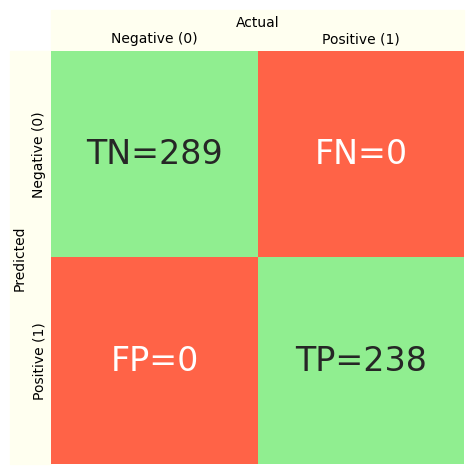

In [23]:
# Assemble our predictor variables (X) and our target (y)
X = coordinates_df.drop('class', axis = 1)
y = coordinates_df['class']

gb = Pipeline([
    ('SS', StandardScaler()),
    ('gb', GradientBoostingClassifier()),
])

param_grid = {
    'gb__learning_rate': [0.1, 0.01], #[0.1, 0.01, 0.001],  # Learning rate (controls the contribution of each tree)
    'gb__n_estimators': [100, 1000], #[100, 500, 1000],  # Number of boosting stages (number of trees)
    'gb__max_depth': [3, 7], #[3, 5, 7],  # Maximum depth of the individual regression estimators
    'gb__min_samples_split': [2, 8], #[2, 4, 8],  # Minimum number of samples required to split an internal node
    'gb__min_samples_leaf': [1, 2], #[1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'gb__max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
}

get_gridsearch_params(X, y, gb, param_grid, folds=5, view_cm = True)

### Model 4 - AdaBoost Model

Pipeline(steps=[('SS', StandardScaler()),
                ('ab',
                 AdaBoostClassifier(learning_rate=0.1, n_estimators=100))])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       254
           1       1.00      1.00      1.00       273

    accuracy                           1.00       527
   macro avg       1.00      1.00      1.00       527
weighted avg       1.00      1.00      1.00       527

Accuracy (train): 1.0
Accuracy (test): 0.9981024667931688
Cross-val-score(cv=5): 0.9991836734693876
Sensitivity(TPR): 0.9963369963369964
Specificity(TNR): 1.0
Precision: 1.0
ROC_AUC: 0.9981684981684982
-------------------------------------------------------



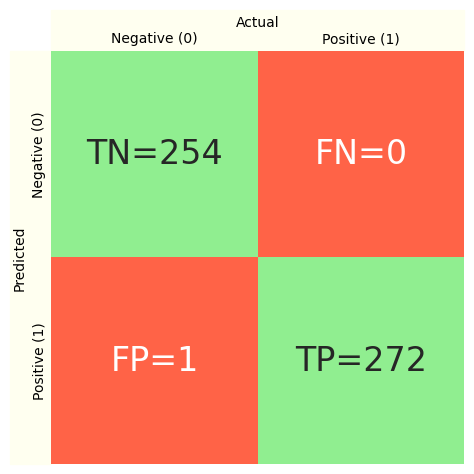

In [24]:
# Assemble our predictor variables (X) and our target (y)
X = coordinates_df.drop('class', axis = 1)
y = coordinates_df['class']

ab = Pipeline([
    ('SS', StandardScaler()),
    ('ab', AdaBoostClassifier(estimator=None, learning_rate=0.1, n_estimators=100)),
])

get_model_score(X, y, ab, view_cm = True)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ab__estimator=None, ab__learning_rate=0.1, ab__n_estimators=100; total time=   3.0s
[CV] END ab__estimator=None, ab__learning_rate=0.1, ab__n_estimators=100; total time=   3.2s
[CV] END ab__estimator=None, ab__learning_rate=0.1, ab__n_estimators=100; total time=   3.0s
[CV] END ab__estimator=None, ab__learning_rate=0.1, ab__n_estimators=100; total time=   2.9s
[CV] END ab__estimator=None, ab__learning_rate=0.1, ab__n_estimators=100; total time=   3.8s
[CV] END ab__estimator=None, ab__learning_rate=0.1, ab__n_estimators=500; total time=  16.1s
[CV] END ab__estimator=None, ab__learning_rate=0.1, ab__n_estimators=500; total time=  17.0s
[CV] END ab__estimator=None, ab__learning_rate=0.1, ab__n_estimators=500; total time=  17.3s
[CV] END ab__estimator=None, ab__learning_rate=0.1, ab__n_estimators=500; total time=  17.7s
[CV] END ab__estimator=None, ab__learning_rate=0.1, ab__n_estimators=500; total time=  17.6s
[CV] END 

[CV] END ab__estimator=DecisionTreeClassifier(max_depth=5), ab__learning_rate=1.0, ab__n_estimators=100; total time=   0.0s
[CV] END ab__estimator=DecisionTreeClassifier(max_depth=5), ab__learning_rate=1.0, ab__n_estimators=500; total time=   0.0s
[CV] END ab__estimator=DecisionTreeClassifier(max_depth=5), ab__learning_rate=1.0, ab__n_estimators=500; total time=   0.0s
[CV] END ab__estimator=DecisionTreeClassifier(max_depth=5), ab__learning_rate=1.0, ab__n_estimators=500; total time=   0.0s
[CV] END ab__estimator=DecisionTreeClassifier(max_depth=5), ab__learning_rate=1.0, ab__n_estimators=500; total time=   0.0s
[CV] END ab__estimator=DecisionTreeClassifier(max_depth=5), ab__learning_rate=1.0, ab__n_estimators=500; total time=   0.0s
[CV] END ab__estimator=DecisionTreeClassifier(max_depth=5), ab__learning_rate=1.0, ab__n_estimators=1000; total time=   0.0s
[CV] END ab__estimator=DecisionTreeClassifier(max_depth=5), ab__learning_rate=1.0, ab__n_estimators=1000; total time=   0.0s
[CV] E

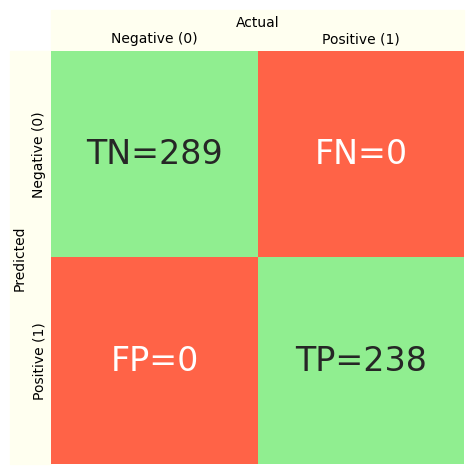

In [25]:
# Assemble our predictor variables (X) and our target (y)
X = coordinates_df.drop('class', axis = 1)
y = coordinates_df['class']

ab = Pipeline([
    ('SS', StandardScaler()),
    ('ab', AdaBoostClassifier(estimator=None, learning_rate=0.1, n_estimators=100)),
])

param_grid = {
    'ab__n_estimators': [100, 500, 1000],   # Number of estimators (trees) in the ensemble
    'ab__learning_rate': [0.1, 0.5, 1.0],   # Learning rate for each individual estimator
    'ab__estimator': [None, DecisionTreeClassifier(max_depth=5)],  # Base estimator used for boosting
}

get_gridsearch_params(X, y, ab, param_grid, folds=5, view_cm = True)

## Model Testing 

In [26]:
y_pred = bm_1.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,

In [27]:
# Inverse transform the predictions to get the original class labels
label_encoder.inverse_transform(y_pred)

array(['Rest', 'Rest', 'Down', 'Rest', 'Down', 'Down', 'Down', 'Rest',
       'Rest', 'Down', 'Rest', 'Down', 'Rest', 'Rest', 'Down', 'Down',
       'Rest', 'Rest', 'Down', 'Rest', 'Rest', 'Down', 'Down', 'Down',
       'Down', 'Down', 'Rest', 'Down', 'Rest', 'Rest', 'Rest', 'Down',
       'Rest', 'Rest', 'Rest', 'Down', 'Rest', 'Rest', 'Down', 'Rest',
       'Rest', 'Down', 'Down', 'Rest', 'Rest', 'Rest', 'Rest', 'Down',
       'Down', 'Down', 'Down', 'Rest', 'Down', 'Rest', 'Rest', 'Rest',
       'Rest', 'Down', 'Rest', 'Rest', 'Rest', 'Down', 'Rest', 'Down',
       'Down', 'Rest', 'Down', 'Down', 'Rest', 'Rest', 'Down', 'Down',
       'Down', 'Down', 'Rest', 'Rest', 'Down', 'Down', 'Rest', 'Down',
       'Rest', 'Rest', 'Rest', 'Rest', 'Rest', 'Down', 'Down', 'Rest',
       'Down', 'Rest', 'Rest', 'Rest', 'Down', 'Down', 'Rest', 'Down',
       'Rest', 'Down', 'Rest', 'Rest', 'Down', 'Rest', 'Down', 'Rest',
       'Down', 'Rest', 'Rest', 'Rest', 'Down', 'Rest', 'Down', 'Rest',
      

**Class 0 is 'Down'; Class '1' is Rest.**

## Model Exporting

In [28]:
with open ('data/squat_2.pkl', 'wb') as f:
    pickle.dump(bm_1, f)

In [29]:
with open('data/label_encoder.pkl', 'wb') as g:
    pickle.dump(label_encoder, g)

## Model Importing and Testing

In [30]:
# Load the pipeline from the file
with open('data/squat_2.pkl', 'rb') as f:
    pipeline = pickle.load(f)

y_pred = pipeline.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,

In [31]:
# Load the label encoder from the file
with open('data/label_encoder.pkl', 'rb') as g:
    label_encoder = pickle.load(g)

# Assuming you have predictions as 0 and 1, you can transform them back to 'Down' and 'Rest'
predictions = [0, 1]  # Replace this with your actual predictions

# Inverse transform the predictions to get the original class labels
class_labels = label_encoder.inverse_transform(predictions)

print(class_labels)

['Down' 'Rest']
